University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
This notetbook offers some auxiliary code to support your programming assignment.    

### Reading the data file 

In [1]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### Read and explore the data file: either the 10, 100, or 500 colours dataset

The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model). 

In [3]:
ncolors, colors = read_data("col10.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 10
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [4]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Examples of ploting a colour ordering

Let us see how to call the plot function, using the original order in which the colours appear in the data file, and another randomised order.

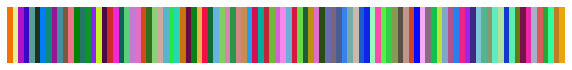

Another random solution:  [58, 34, 67, 13, 42, 22, 29, 6, 59, 60, 15, 18, 65, 77, 36, 71, 35, 38, 40, 49, 88, 7, 44, 4, 61, 16, 3, 82, 30, 68, 12, 26, 97, 89, 5, 73, 48, 41, 50, 70, 32, 31, 46, 87, 0, 28, 99, 63, 76, 91, 75, 80, 94, 56, 19, 43, 86, 72, 93, 39, 95, 54, 45, 2, 14, 11, 51, 37, 98, 84, 23, 1, 52, 20, 47, 92, 90, 25, 27, 53, 17, 62, 78, 85, 21, 79, 24, 66, 74, 10, 33, 64, 55, 8, 83, 96, 69, 57, 9, 81]


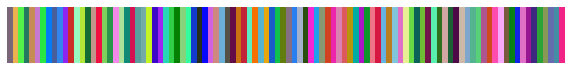

Same ordering of colurs with a larger ratio


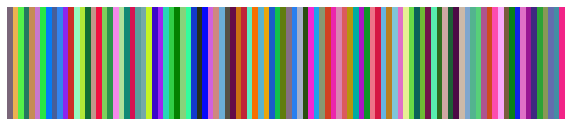

In [5]:
import random as rnd

# Plot all the colors in the order they are listd in the file
order1 = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
plot_colors(colors, order1)    #  You will notice that colors are not ordered in the file

# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol():
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol

order2 = random_sol()
print("Another random solution: ", order2)
plot_colors(colors, order2)  # the colors are not ordered, but this is a different order

# You can test different ratios of the hight/width of the lines in the plot
print("Same ordering of colurs with a larger ratio")
plot_colors(colors, order2, 20)

### Evaluation function to determine the quality of a given ordering of colours

When solving the problem using optimisation heuristics, we need an evaluation function to measure the quality of a sulution. The problem is formulated as a minimisation  problem. We want to minimise the pair-wise distance between consequtive colours in the ordering. 

This function computes the quality of given ordering of colours. The smaller the evaluation function the better, as this is is formulated as a minimisation problem

In [6]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

#### Evaluating the quality of given solutions

Let us use the evaluation function to calculate the quality of the arbitrary orderings of colours *order1* and *order2*

In [7]:
e1 = evaluate(colors, order1)
print(f'Evaluation of order1: {e1}') # Displaying all decimals
print(f'Evaluation of order1: {np.round(e1,4)}') # rounding to display only 4 decimals. This is better for display

e2 = evaluate(colors, order2)
print(f'Evaluation of order1: {e2}') # Displaying all decimals
print(f'Evaluation of order1: {np.round(e2,4)}') # rounding to display only 4 decimals. This is better for display

Evaluation of order1: 64.70327551062434
Evaluation of order1: 64.7033
Evaluation of order1: 65.64059138248528
Evaluation of order1: 65.6406
